# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [1]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt

In [2]:
!wget https://assets.gezdev.com/dip/AAA.bmp

--2022-10-21 13:12:44--  https://assets.gezdev.com/dip/AAA.bmp
Resolving assets.gezdev.com (assets.gezdev.com)... 203.158.180.101
Connecting to assets.gezdev.com (assets.gezdev.com)|203.158.180.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2359350 (2.2M) [image/x-ms-bmp]
Saving to: ‘AAA.bmp’

AAA.bmp             100%[===================>]   2.25M  1.26MB/s    in 1.8s    

2022-10-21 13:12:48 (1.26 MB/s) - ‘AAA.bmp’ saved [2359350/2359350]



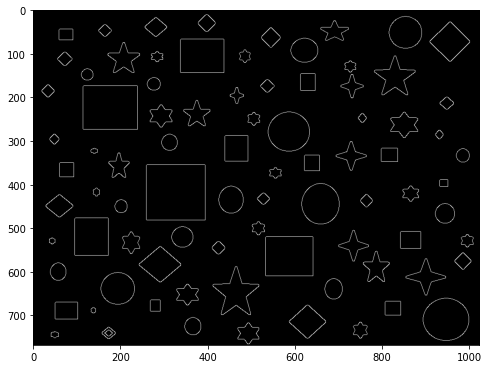

In [3]:
src = cv.imread("./AAA.bmp")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

## Contour Finding 

The picture has 84 circles.


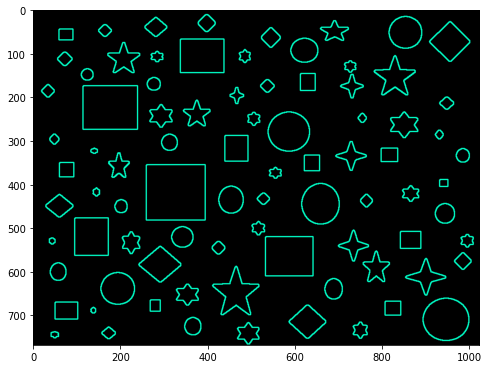

In [4]:
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
#print(contours)
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
cv.drawContours(drawn_contour_img, contours, -1, (0,255,200), 2) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
print(f"The picture has {len(contours)} circles.")
#print(len(contours))
plt.imshow(drawn_contour_img)
plt.show()

In [5]:
contours1 = [c for c in contours if (cv.boundingRect(c)[2]*cv.boundingRect(c)[3])>3000]
contours2 = [c for c in contours if (cv.contourArea(c))>3000]

In [6]:
contours3 = list(contours)
contours4 = list(contours)

In [7]:
#Filter By BoundingRectBox Area
i=0
while (1):
  x,y,w,h = cv.boundingRect(contours3[i])
  if((w*h)<=3000):
    contours3.pop(i)
  else:
    i+=1
  if(i>=len(contours3)):
      break;


In [8]:
#Filter By Real Area
i=0
while (1):
  if(cv.contourArea(contours4[i])<=3000):
    contours4.pop(i)
  else:
    i+=1
  if(i>=len(contours4)):
      break;
 
contours4 = list(contours)


## Show result


In [9]:
def show_contour(contours_input):
  from numpy import random
  drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
  drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
  for i,value in enumerate(contours_input):
      c = random.randint(255, size=(3))
      color = (c[0].item(),c[1].item(),c[2].item())
      cv.drawContours(drawn_contour_img, contours_input, i, color, 1)
      x,y,w,h = cv.boundingRect(contours_input[i])
      cv.putText(drawn_contour_img,str(i+1),(x,y-3),cv.FONT_HERSHEY_SIMPLEX,0.4,color,1)
      cv.rectangle(drawn_contour_img,(x,y),(x+w,y+h),color,1)
  plt.rcParams["figure.figsize"] = [15, 15]
  plt.imshow(drawn_contour_img)
  plt.show()
  print(f"All Circle => {i+1}")

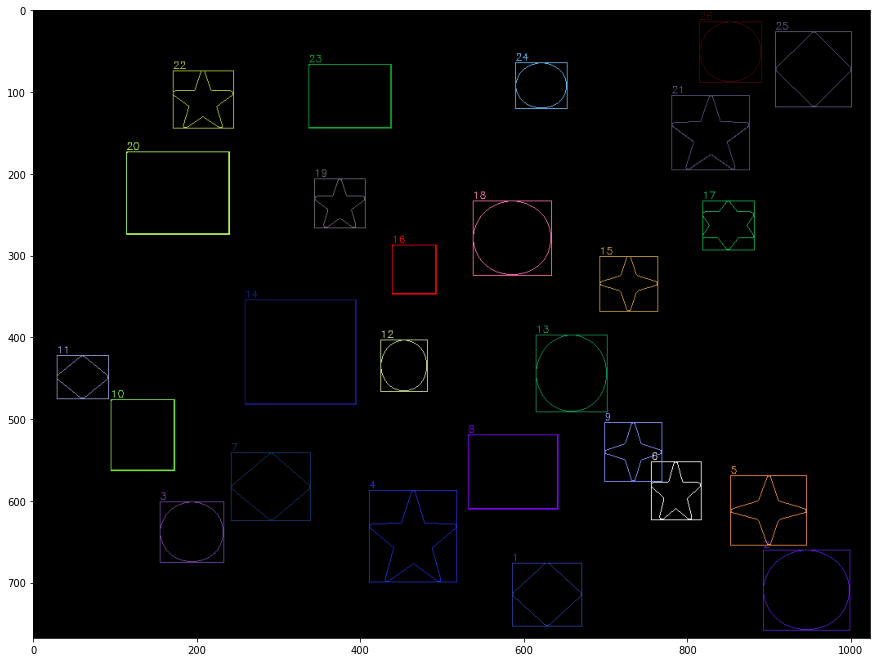

All Circle => 26


In [10]:
show_contour(contours1)
#show_contour(contours2)
#show_contour(contours3)
#show_contour(contours4)